# Projeto - Avaliação de risco de crédito

Atualmente, as instituições financeiras já se utilizam de mecanismos de Machine Learning em seu cotidiano, seja para avaliar a detecção de fraudes nos catões de crédito ou avaliar o risco de crédito. 

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>

A avaliação do risco de crédito é uma prática importante no setor financeiro para determinar a probabilidade de um mutuário entrar em inadimplência. Inadimplência é o termo utilizado para indicar o descumprimento de obrigações e/ou condições de empréstimos, como financiamentos ou dívidas de cartão de crédito. Muitas vezes, o principal motivo do descumprimento das condições de pagamento é a falta de meios financeiros do cliente. O principal objetivo é minimizar o risco e maximizar o lucro do setor. Tradicionalmente, as avaliações de risco de crédito eram feitas por especialistas financeiros, mas com o advento da tecnologia, o uso de modelos de aprendizado de máquina tornou-se mais comum.

O aprendizado de máquina é uma técnica poderosa que permite que os computadores aprendam padrões complexos em dados sem serem explicitamente programados. A aplicação do aprendizado de máquina à avaliação de risco de crédito pode ajudar a automatizar e agilizar o processo e melhorar a precisão dos resultados.

Os dados importados neste projeto foi utilizado dados da startup Nubank. Esses dados vieram de uma competição promovida pela empresa. Portanto, neste projeto, será apresentado o uso da biblioteca ScikitLearn Python para construir um modelo de aprendizado de máquina para avaliar o risco de crédito com base em vários fatores, como histórico de crédito, renda, idade, etc. O resultado será um modelo preciso de aprendizado de máquina que pode ser usado para prever a probabilidade de um mutuário não pagar um empréstimo, ajudando a minimizar o risco e maximizar os lucros no setor financeiro.

## Importação de informações dos dados

In [2]:
# warning ignoresm
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [3]:
# importação dos dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

Observa-se as primeiras e últimas colunas.



In [4]:
df.head(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [5]:
df.tail(5)

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
44999,a7504e93-123a-f965-70c6-ab01a0d475f7,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,530.0,101.095813,0.011369,97.362918,0.31,4226.74,...,781,"(-23.13900985246712, -52.29465769715389)",Facebook,296-8101743,112766.0,BR-MT,41693,"{'tags': ['dfa', 'c55', 'pro+aty', 'n8', 'n4']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN


Aqui apresenta-se uma função que apresenta algumas informação dos dados: número de linhas, número de variáveis, quantidade de dados ausentes, nomes das variáveis, os tipos das variáveis, valores únicos de cada coluna, porcentagem dos valores ausentes nas colunas. 

In [6]:
def info_dados(df):
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nDados ausentes (total):\t{}".format(df.isnull().sum().max()))
    print("\nNomes das features:\n{}".format(df.columns.values))
    print("\nTipos de Variáveis (por coluna)\n{}".format(df.dtypes))
    print("\nValores únicos (por coluna):\n{}".format(df.nunique().sort_values(ascending=False)))
    print("\nPorcentagem de valores ausentes (por coluna):\n{}".format((df.isnull().sum() * 100/ df.shape[0]).sort_values(ascending=False)))

In [7]:
info_dados(df)

Número de entradas (linhas):  45000

Número de variáveis (colunas):  43

Dados ausentes (total):	43478

Nomes das features:
['ids' 'target_default' 'score_1' 'score_2' 'score_3' 'score_4' 'score_5'
 'score_6' 'risk_rate' 'last_amount_borrowed' 'last_borrowed_in_months'
 'credit_limit' 'reason' 'income' 'facebook_profile' 'state' 'zip'
 'channel' 'job_name' 'real_state' 'ok_since' 'n_bankruptcies'
 'n_defaulted_loans' 'n_accounts' 'n_issues' 'application_time_applied'
 'application_time_in_funnel' 'email'
 'external_data_provider_credit_checks_last_2_year'
 'external_data_provider_credit_checks_last_month'
 'external_data_provider_credit_checks_last_year'
 'external_data_provider_email_seen_before'
 'external_data_provider_first_name' 'external_data_provider_fraud_score'
 'lat_lon' 'marketing_channel' 'profile_phone_number' 'reported_income'
 'shipping_state' 'shipping_zip_code' 'profile_tags' 'user_agent'
 'target_fraud']

Tipos de Variáveis (por coluna)
ids                            

* Contém neste conjunto de dados 45000 entradas. Possuem 43 colunas (variáveis). 
* A variável alvo para o treinamento do modelo é `target_default` está separada em `True` e `False`
* A variável `id` aparenta estar codificado presentando o anonimato do cliente e também apresentam todos valores únicos. 
* As variávels `score_1`e `score_2` também apresentam algum tipo de codificação. Equanto `score_3`, `score_4`,`score_5` são variáveis numéricas.
* Outras variáveis codificados como `reason`, `state`, `zip`, `channel`, `job_name`, `real_state` podem estar assim para preservarem anonimato. 
* As colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor.
*  Na coluna alvo `target_defaul` 7.24% dos valores estão ausentes. 
* As variáveis `target_fraud`, `last_amount_borrowed`, `last_borrowed_in_months`, `ok_since`, `external_data_provider_credit_checks_last_2_year` possuem mais 50% dos seus valores ausentes.
* As variáves `external_data_provider_credit_checks_last_year`, `credit_limit`, `n_issues` possuem entre 25-34% do seus valores ausentes.

In [8]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Aqui são resumidas algumas inconstâncias na descrição das variáveis numéricas:

* A coluna `external_data_provider_credit_checks_last_2_year` possuem desvio padrão, valores máximos e mínimos iguas a zero. 
* Há valores inf (infinitos) na varíavel `reported_income`. Obviamente isso irá interferir no treinamento do modelo então essses valores serão subisituidos por ausentes (NaN).
* Há um valor mímnimo negativo de -999 na variável ``external_data_provider_email_seen_before`. Ou este valor um *outlier* ou talvez o sistema não aceitasse o cadastro de valor ausente. Então esse valor será substituído para ausente (NaN). 
* Na variável credit_limit possui um valor mínimo 0. Como os dados são de risco de crédito, pensando em fornecer mais crédito ou não,  é coerenteque esses clientes tenham recebido algum valor mínimo diferente de 0 ou então eles nem participariam desse cadastro. Então será adotado que este 0 represente um valor ausente e será substituído para NaN. 

In [9]:
df[['application_time_applied']]

,application_time_applied
0,07:52:34
1,02:34:29
2,00:60:02
3,11:20:49
4,13:39:03
...,...
44995,13:27:39
44996,22:50:49
44997,09:60:49
44998,02:18:51


Essa coluna apresenta as horas das aplicações é visto que esla está no formato `object`. No momento da limpeza será convertido esses valores para `int` deixando apenas a hora da aplicação. 

In [10]:
#Imprimindo os valores únicos da variável email
df['email'].unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com',
       'hotmaill.com', 'gmaill.com'], dtype=object)

Aqui é visto que há erros de digitação nos emails. Será corrigido com a limpeza.

## Limpeza dos dados

In [11]:
# Ponto de retorno
df_clean = df.copy()

In [12]:
# Excluindo colunas desnecessárias:
drop_var = ['external_data_provider_credit_checks_last_2_year', 'ok_since', 'channel',
        'target_fraud','ids', 'last_amount_borrowed', 'lat_lon', 'profile_phone_number', 
        'reason', 'zip', 'user_agent', 'job_name', 'external_data_provider_first_name',
        'last_borrowed_in_months', 'state', 'shipping_zip_code', 'profile_tags']

df_clean.drop(labels=drop_var, axis=1, inplace=True)


# Excluindo linhas com valores ausentes da variável `target_default`:
df_clean.dropna(subset=['target_default'], inplace=True)

# Substituindo valores na coluna email 
df_clean.loc[df_clean['email'] == 'hotmaill.com', 'email'] = 'hotmail.com'
df_clean.loc[df_clean['email'] == 'gmaill.com', 'email'] = 'gmail.com'

# Deixando apenas a sigla do estado
df_clean['shipping_state'] = df_clean['shipping_state'].str[-2:]

# Excluindo valores ausentes em 'external_data_provider_email_seen_before'
df_clean['external_data_provider_email_seen_before'] = df_clean['external_data_provider_email_seen_before'].apply(lambda x: np.nan if x < 0 else x)

# Excluindo valores inf em 'reported_income'
df_clean['reported_income'] = df_clean['reported_income'].apply(lambda x: np.nan if x == np.inf else x)

# Corrigindo a a coluna facebook_profile
df_clean['facebook_profile'].fillna(value=False, inplace=True, axis=0)
df_clean['facebook_profile'] = df_clean['facebook_profile'].map({True: 'Sim', False: 'Não'})

# Excluidno valores ausentes em 'credit_limit'
df_clean['credit_limit'] = df_clean['credit_limit'].apply(lambda x: np.nan if x == 0 else x)

# Correção de 'application_time_applied' deixando apenas as horas
df_clean['application_time_applied'] = df_clean['application_time_applied'].str[:2].astype(int)
df_clean.loc[df_clean['application_time_applied'] == 24, 'application_time_applied'] = 0

Aqui será criada e aplicada uma função com o objetivo de substituir os valores ausentes das variáveis numéricas na mediana e os valores ausentes nas categóricas por valores numa propoção que eles aparecem nas colunas. 

In [13]:
def preencher_proporcional(col):
    """ Preenche valores ausentes na mesma proporção dos valores presentes ou pela mediana em variáveis numéricas.
    Recebe uma coluna e retorna a coluna com os valores ausentes preenchidos
    na proporção dos valores previamente existentes ou pela mediana em variáveis numéricas."""
    # Criação do objeti SimpleImputer
    
    if pd.api.types.is_numeric_dtype(col):
        imp = SimpleImputer(strategy='median')
    else:
        imp = SimpleImputer(strategy='most_frequent')

    # Fit tranform das colunas
    col_filled = imp.fit_transform(col.values.reshape(-1,1)).flatten()
    
    return col_filled

df_clean = df_clean.apply(lambda col: preencher_proporcional(col) if col.isnull().sum() > 0 else col)

In [14]:
def info_dados(df):    
    print('Número de entradas (linhas): ', df.shape[0])
    print('\nNúmero de variáveis (colunas): ', df.shape[1])
    print("\nNomes das features:\n{}".format(df.columns.values))
    print("\nTipos de Variáveis (por coluna)\n{}".format(df.dtypes))
    print("\nValores únicos (por coluna):\n{}".format(df.nunique().sort_values(ascending=False)))
    print("\nDados ausentes (total):\t{}".format(df.isnull().sum().max()))
    print("\n Porcentagem de valores ausentes (por coluna):\n{}".format((df.isnull().sum() * 100/ df.shape[0]).sort_values(ascending=False)))

info_dados(df_clean)

Número de entradas (linhas):  41741

Número de variáveis (colunas):  26

Nomes das features:
['target_default' 'score_1' 'score_2' 'score_3' 'score_4' 'score_5'
 'score_6' 'risk_rate' 'credit_limit' 'income' 'facebook_profile'
 'real_state' 'n_bankruptcies' 'n_defaulted_loans' 'n_accounts' 'n_issues'
 'application_time_applied' 'application_time_in_funnel' 'email'
 'external_data_provider_credit_checks_last_month'
 'external_data_provider_credit_checks_last_year'
 'external_data_provider_email_seen_before'
 'external_data_provider_fraud_score' 'marketing_channel'
 'reported_income' 'shipping_state']

Tipos de Variáveis (por coluna)
target_default                                      object
score_1                                             object
score_2                                             object
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_

A segunda parte da limpeza será a visualização dos boxplots para variáveis numéricas. A partir disto pode-se identificar quais dessas variáveis possuem valores outliers que precisarão serem deletados. 

In [15]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

df_numeric = df_clean[numeric_cols]

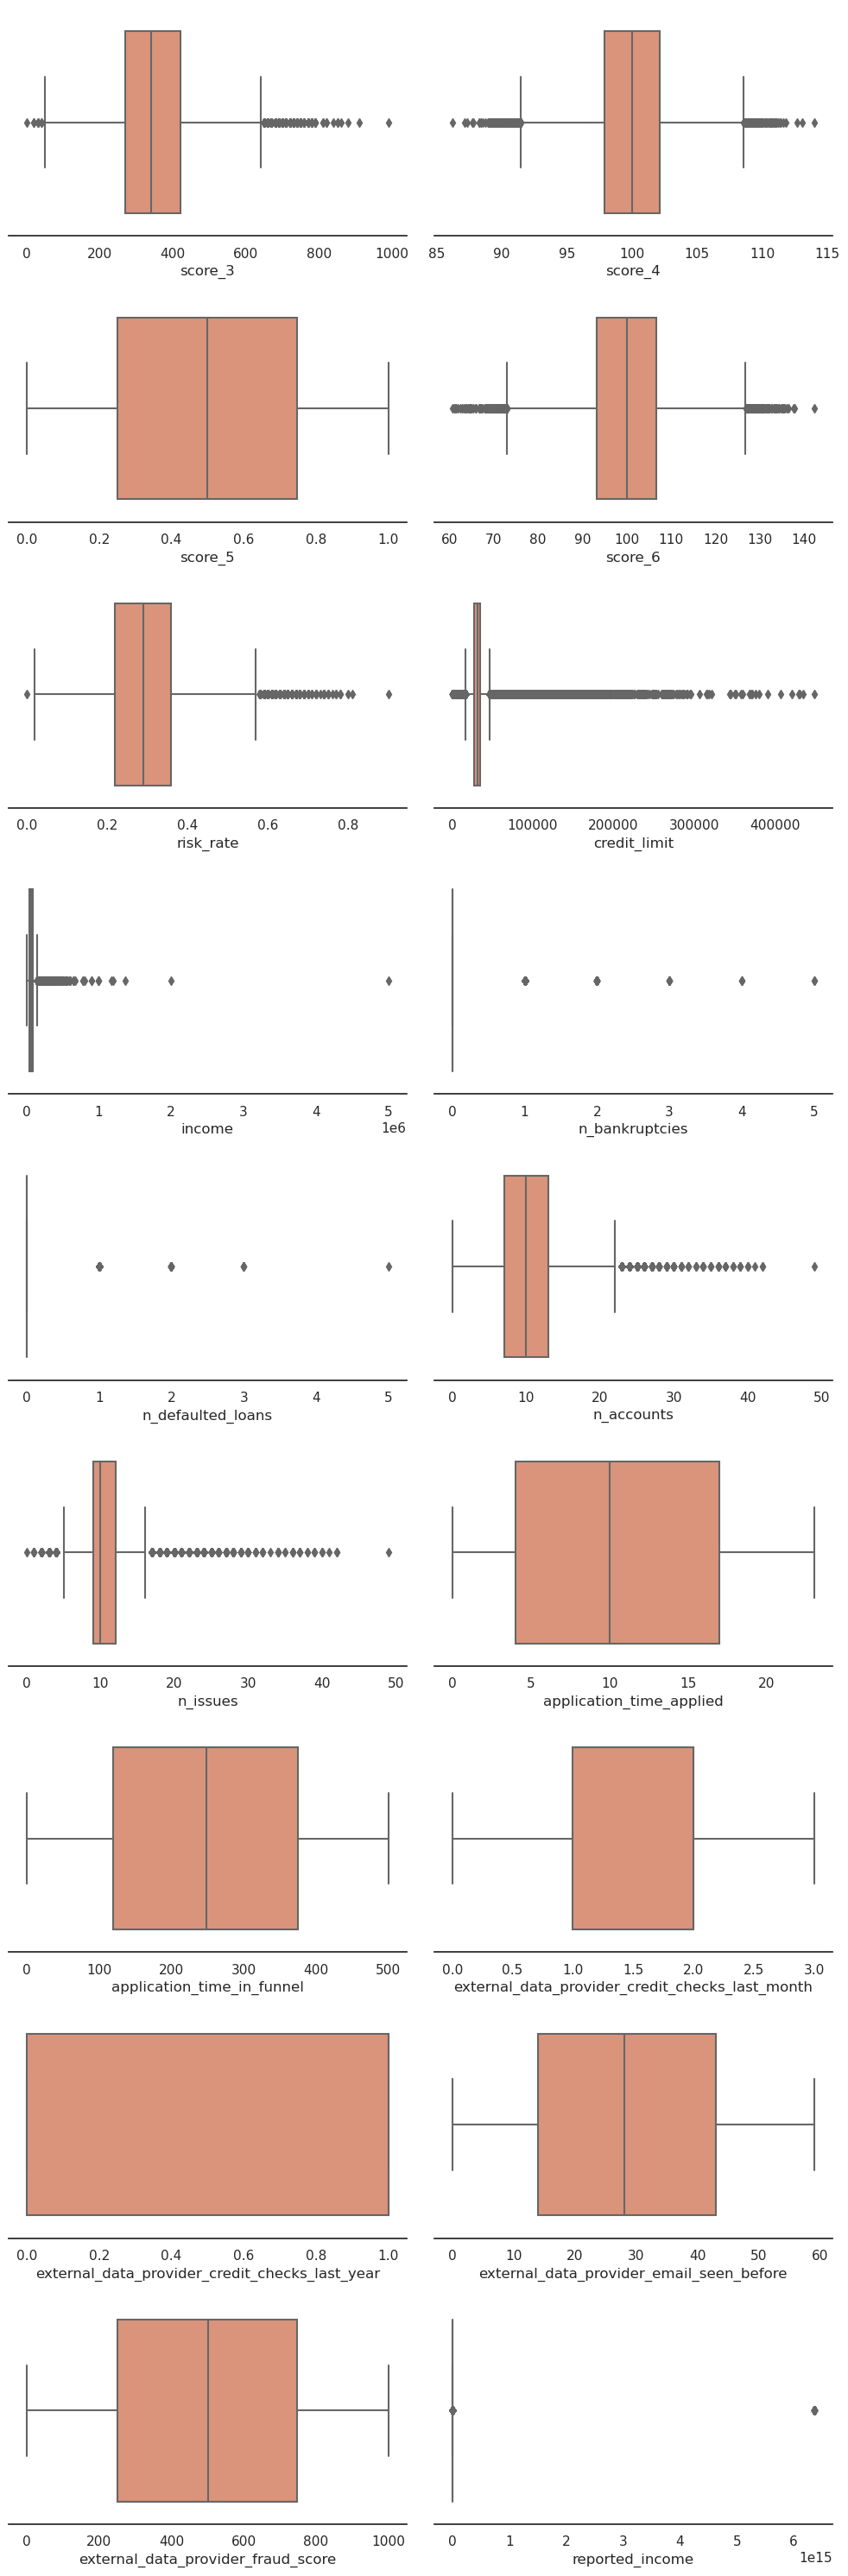

In [17]:
sns.set_theme(style="white", palette="flare")

fig, axs = plt.subplots(nrows=9, ncols=2, figsize=(10, 30))

for i, col in enumerate(df_numeric.columns):
    k = i // 2
    j = i % 2
    sns.boxplot(x=df_numeric[col], ax=axs[k][j])

sns.despine(left = True)
plt.tight_layout()
plt.show()

`score_3`, `score_4`, `score_6`, `risk_rate`, `last_borrowed_in_months`, `income`, `n_accounts`, `n_issues`, `reported_income`são as variáveis que apresentaram outliers. 

In [18]:
cols_outliers = ['score_3', 'score_4', 'score_6', 'risk_rate', 'income', 'n_accounts', 'n_issues', 'reported_income']

# função
def outlier_boundary(dataset, column_list):
    # Itera sobre as colunas da lista passada como argumento
    for column in column_list:
        # Verifica se a coluna existe no dataset
        if column in dataset:
            # Calcula as estatísticas resumidas para a coluna
            des = dataset[column].describe()
            # Recupera o primeiro quartil (Q1)
            Q1 = des["25%"]
            # Recupera o terceiro quartil (Q3)
            Q3 = des["75%"]
            # Calcula a amplitude interquartil (IQR)
            IQR = Q3 - Q1
            # Calcula os limites superior e inferior
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            # Imprime os limites superior e inferior para a coluna
            print(f"O limite superior para a coluna {column} é {upper} e o limite inferior é {lower}.")

#aplicação
outlier_boundary(df_clean, cols_outliers)

O limite superior para a coluna score_3 é 645.0 e o limite inferior é 45.0.
O limite superior para a coluna score_4 é 108.56392987615001 e o limite inferior é 91.44171593175.
O limite superior para a coluna score_6 é 126.8037020315 e o limite inferior é 73.00980538750002.
O limite superior para a coluna risk_rate é 0.57 e o limite inferior é 0.010000000000000037.
O limite superior para a coluna income é 146552.85499999998 e o limite inferior é -17500.384999999995.
O limite superior para a coluna n_accounts é 22.0 e o limite inferior é -2.0.
O limite superior para a coluna n_issues é 16.5 e o limite inferior é 4.5.
O limite superior para a coluna reported_income é 301242.5 e o limite inferior é -99289.5.


Após visualizar os valores de IQR, será excluido os valores a partir desses limites. 


In [19]:
#Loop em relação as features
for feature in cols_outliers:
  Q1 = df_clean[feature].quantile(q=0.25) #Definindo o primeiro quartil
  Q3 = df_clean[feature].quantile(q=0.75) #Definindo o segundo quartil
  IQR = Q3 - Q1 #Definindo o interquartil
  Limite_Superior = Q3 + 1.5 * IQR #Definindo o Limite Superior
  Limite_Inferior = Q1 - 1.5 * IQR #Definindo o Limite Inferior

  #Selecionando apenas as linhas sem outliers
  df_clean = df_clean.loc[(df_clean[feature] >= Limite_Inferior) & (df_clean[feature] <= Limite_Superior)]

  #Resetando o índice
  df_clean = df_clean.reset_index(drop=True)

In [20]:
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income
count,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000,33913.000000
mean,344.064223,100.015057,0.498781,99.905335,0.290571,33712.096394,63636.621936,0.079439,0.004246,9.837201,10.037567,10.666205,248.442072,1.501637,0.669596,28.464895,500.895615,100367.371568
std,105.632640,3.085418,0.288394,9.743267,0.096994,21751.968292,27667.525089,0.279013,0.073937,3.363225,2.511299,7.182900,146.099081,1.114972,0.470366,17.012840,288.301338,57536.865710
min,50.000000,91.437921,0.000064,73.041109,0.020000,300.000000,4821.180000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,403.000000
25%,270.000000,97.883263,0.251080,93.214905,0.220000,26746.000000,42033.280000,0.000000,0.000000,7.000000,9.000000,4.000000,121.000000,1.000000,0.000000,14.000000,252.000000,50582.000000
50%,340.000000,100.033870,0.498384,99.963329,0.280000,30990.000000,60013.270000,0.000000,0.000000,10.000000,10.000000,10.000000,249.000000,2.000000,1.000000,28.000000,503.000000,100800.000000
75%,410.000000,102.131616,0.747899,106.539447,0.350000,30990.000000,80029.070000,0.000000,0.000000,12.000000,11.000000,17.000000,376.000000,2.000000,1.000000,43.000000,748.000000,150136.000000
max,640.000000,108.562879,0.999973,126.766056,0.570000,434506.000000,146414.180000,5.000000,3.000000,22.000000,16.000000,23.000000,500.000000,3.000000,1.000000,59.000000,1000.000000,200000.000000


Observa-se que na descrição estatística as incosistências antes vistas não estão mais presentes. 

## Análise exploratória


Para análise exploratório é interessante dividir as variáveis em númericas e categóricas. Essa divisão facilita na construção dos gráficos que serão analisados. Para que fosse feito essa divisão criou-se novos conjuntos de dados filtrados pelo valor "verdadeiro" da inadimplência. 

In [21]:
# Filtra os dados onde values_target é True
df_clean['target_default'] = df_clean['target_default'].astype(int)

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Variáveis Categórias:")
print(categorical_cols)
print("\nVariáveis Numéricas:")
print(numeric_cols)

Variáveis Categórias:
['score_1', 'score_2', 'facebook_profile', 'real_state', 'email', 'marketing_channel', 'shipping_state']

Variáveis Numéricas:
['target_default', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'credit_limit', 'income', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income']


In [22]:
categorical_cols = ['facebook_profile', 'email', 'marketing_channel', 'shipping_state']

numerical_cols = ['score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'credit_limit', 'income', 
                  'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied',
                  'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 
                  'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 
                  'external_data_provider_fraud_score', 'reported_income']

### Análise exploratória variáveis numéricas 


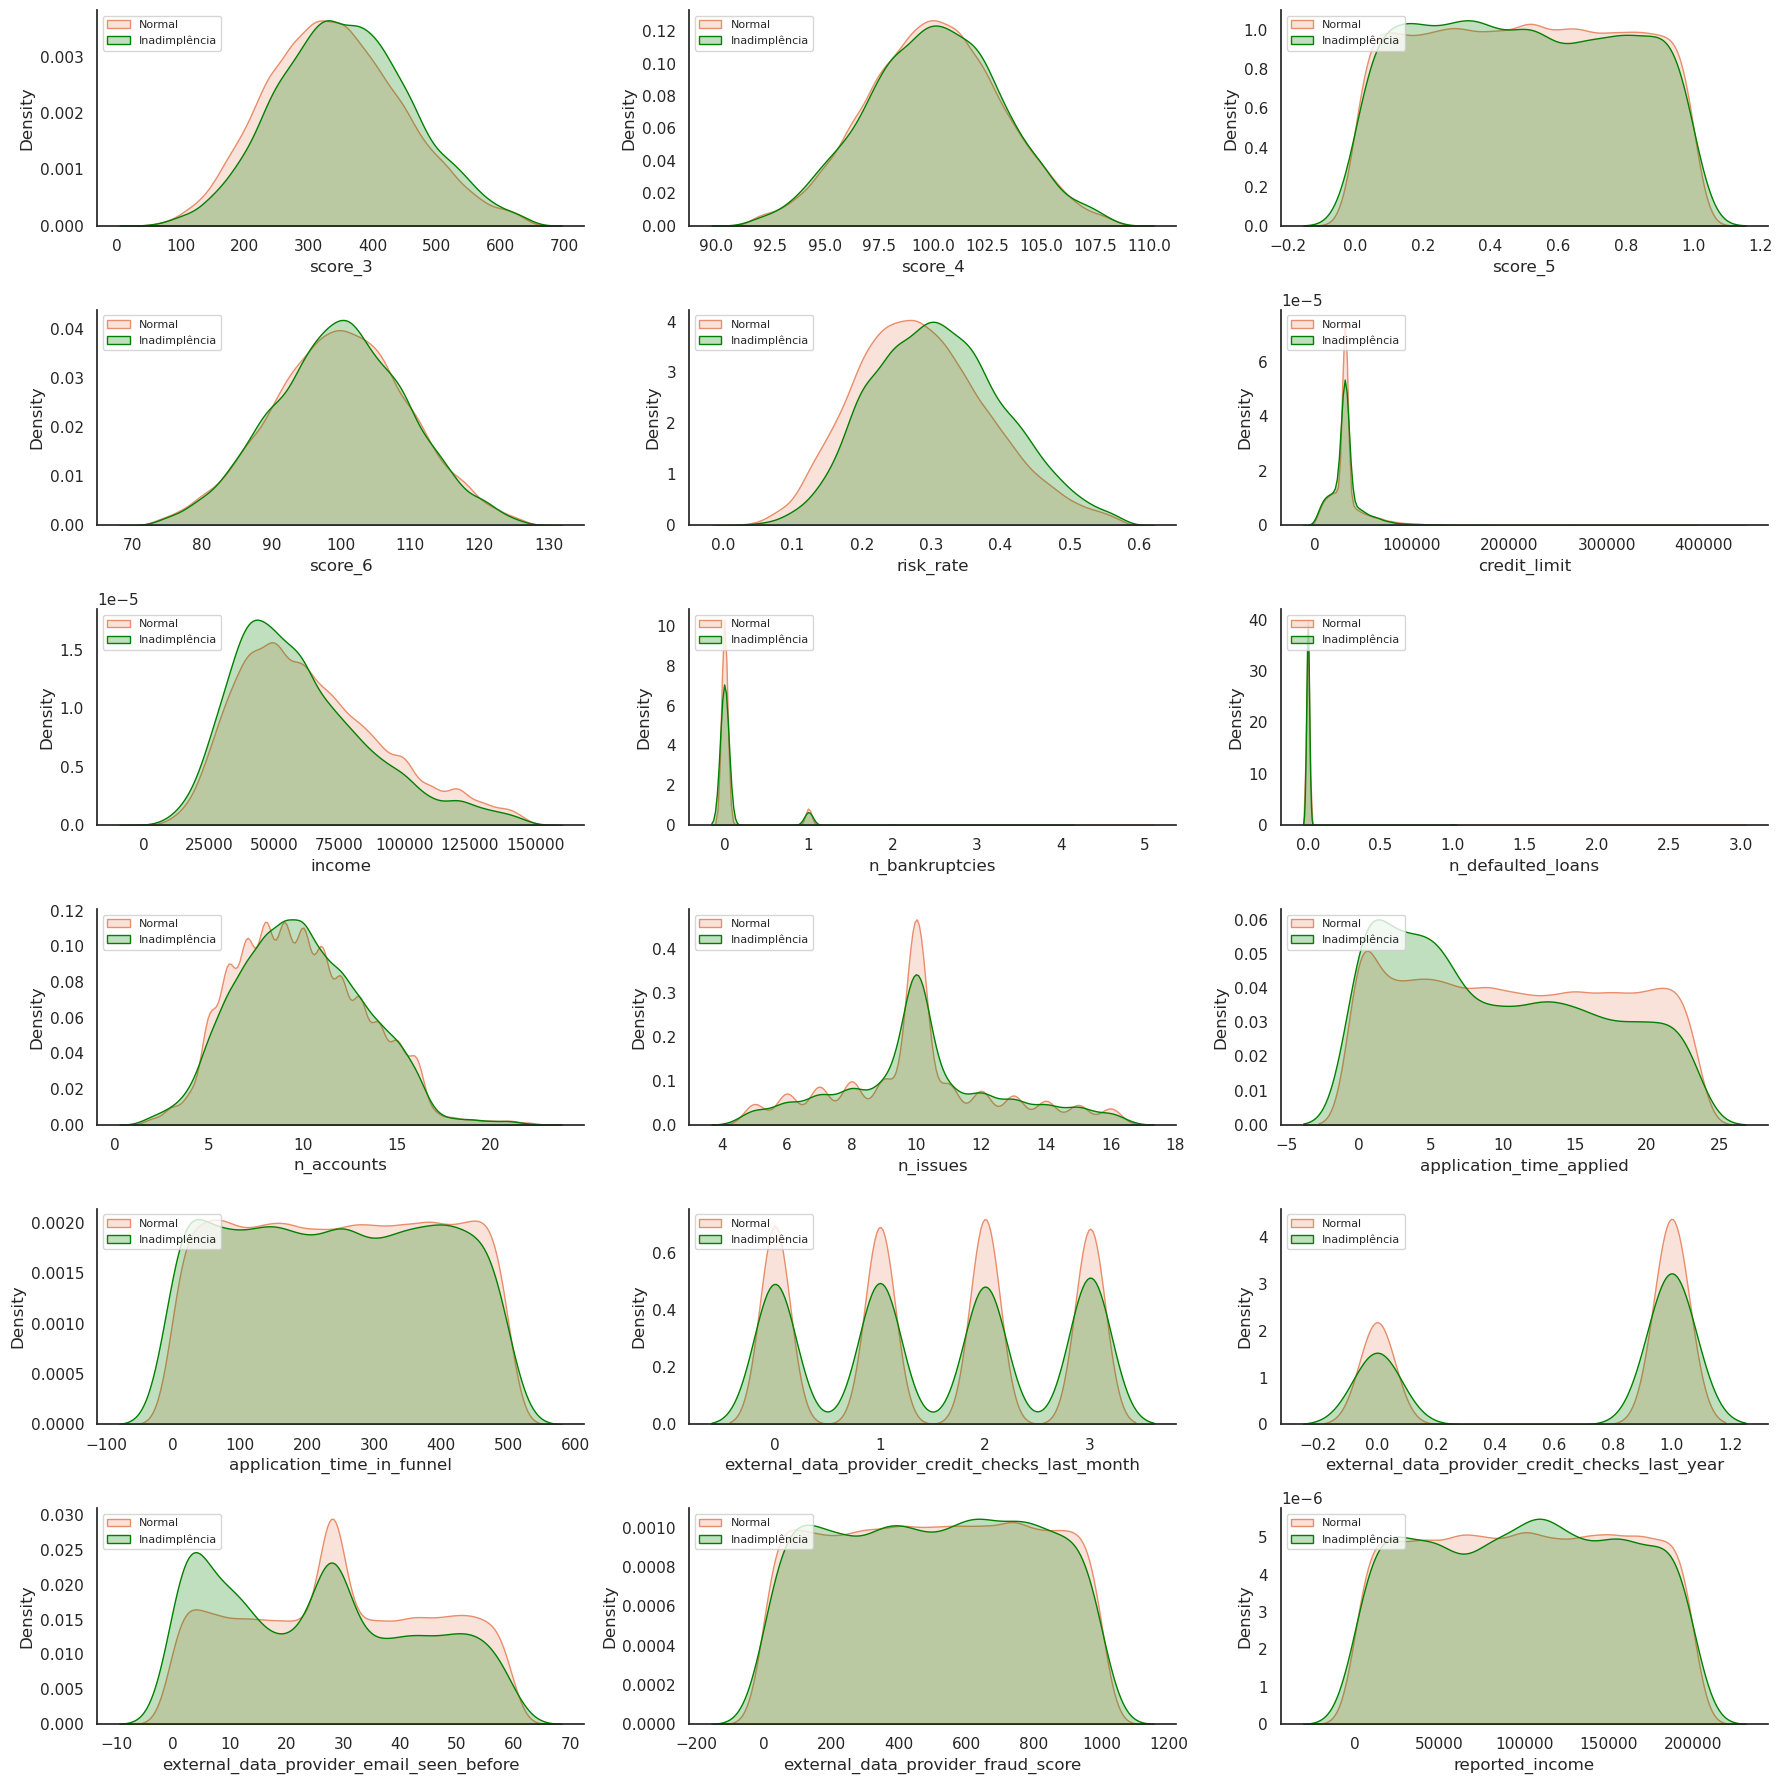

In [23]:
num_plots=len(numerical_cols)
df_false= df_clean[df_clean['target_default']==0]
df_true= df_clean[df_clean['target_default']==1]

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(18,18))

idx = 0

for col in numerical_cols:
    idx += 1
    if idx <= num_plots + 1:
        plt.subplot(6,3,idx)
        sns.kdeplot(df_false[col], label="Normal", shade=True)
        sns.kdeplot(df_true[col], label="Inadimplência", shade=True, color="green")

        plt.legend(loc='upper left', fontsize=8)
    else:
      break

sns.despine()
plt.tight_layout()
plt.show()

* É visto que há mais inadimplências nas rendas (variável `income`) entre 25000 e 75000. 
* Nos valores mais baixos de `external_data_provider_email_seen_before` há mais inadimplências. 
* De acordo com o gráfico de `application_time_applied` as inadimplências acontecem mais nos horários de 0:00 e 6:00. Verfifiquemos esse gráfico sozinho, pois esta é uma importante informação. 

Observa-se unicamente a variável `application_time_applied`. A informação de algumas horas específicas para ocorrência de inadimplências precisa ser destacada. 

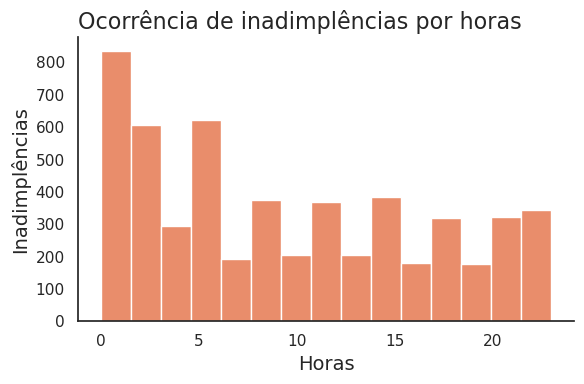

In [25]:
fig, ax = plt.subplots(figsize = (6,4))

sns.set_theme(style="white", palette="flare")
ax.hist(df_clean['application_time_applied'][df_clean['target_default'] == 1], bins=15)

ax.set_title('Ocorrência de inadimplências por horas', loc = 'left', fontsize = 16)
ax.set_ylabel('Inadimplências', fontsize = 14)
ax.set_xlabel('Horas', fontsize = 14)
sns.despine()
plt.tight_layout()
plt.show()

A informação sobre as horas de inadimplências ficou mais clara ao visulizar o histograma acima. Agora, para enriquecer o modelo, é interessante criar uma variável que corresponda essa informação. Para isso será criada uma variável que corresponda as horas entre 00:00 e 06:00 com valor 1 e valor 0 para os outros horários.

In [26]:
df_clean['overnight'] = df_clean['application_time_applied'].apply(lambda x: 1 if x <= 6 else 0)

### Análise exploratório variáveis categóricas

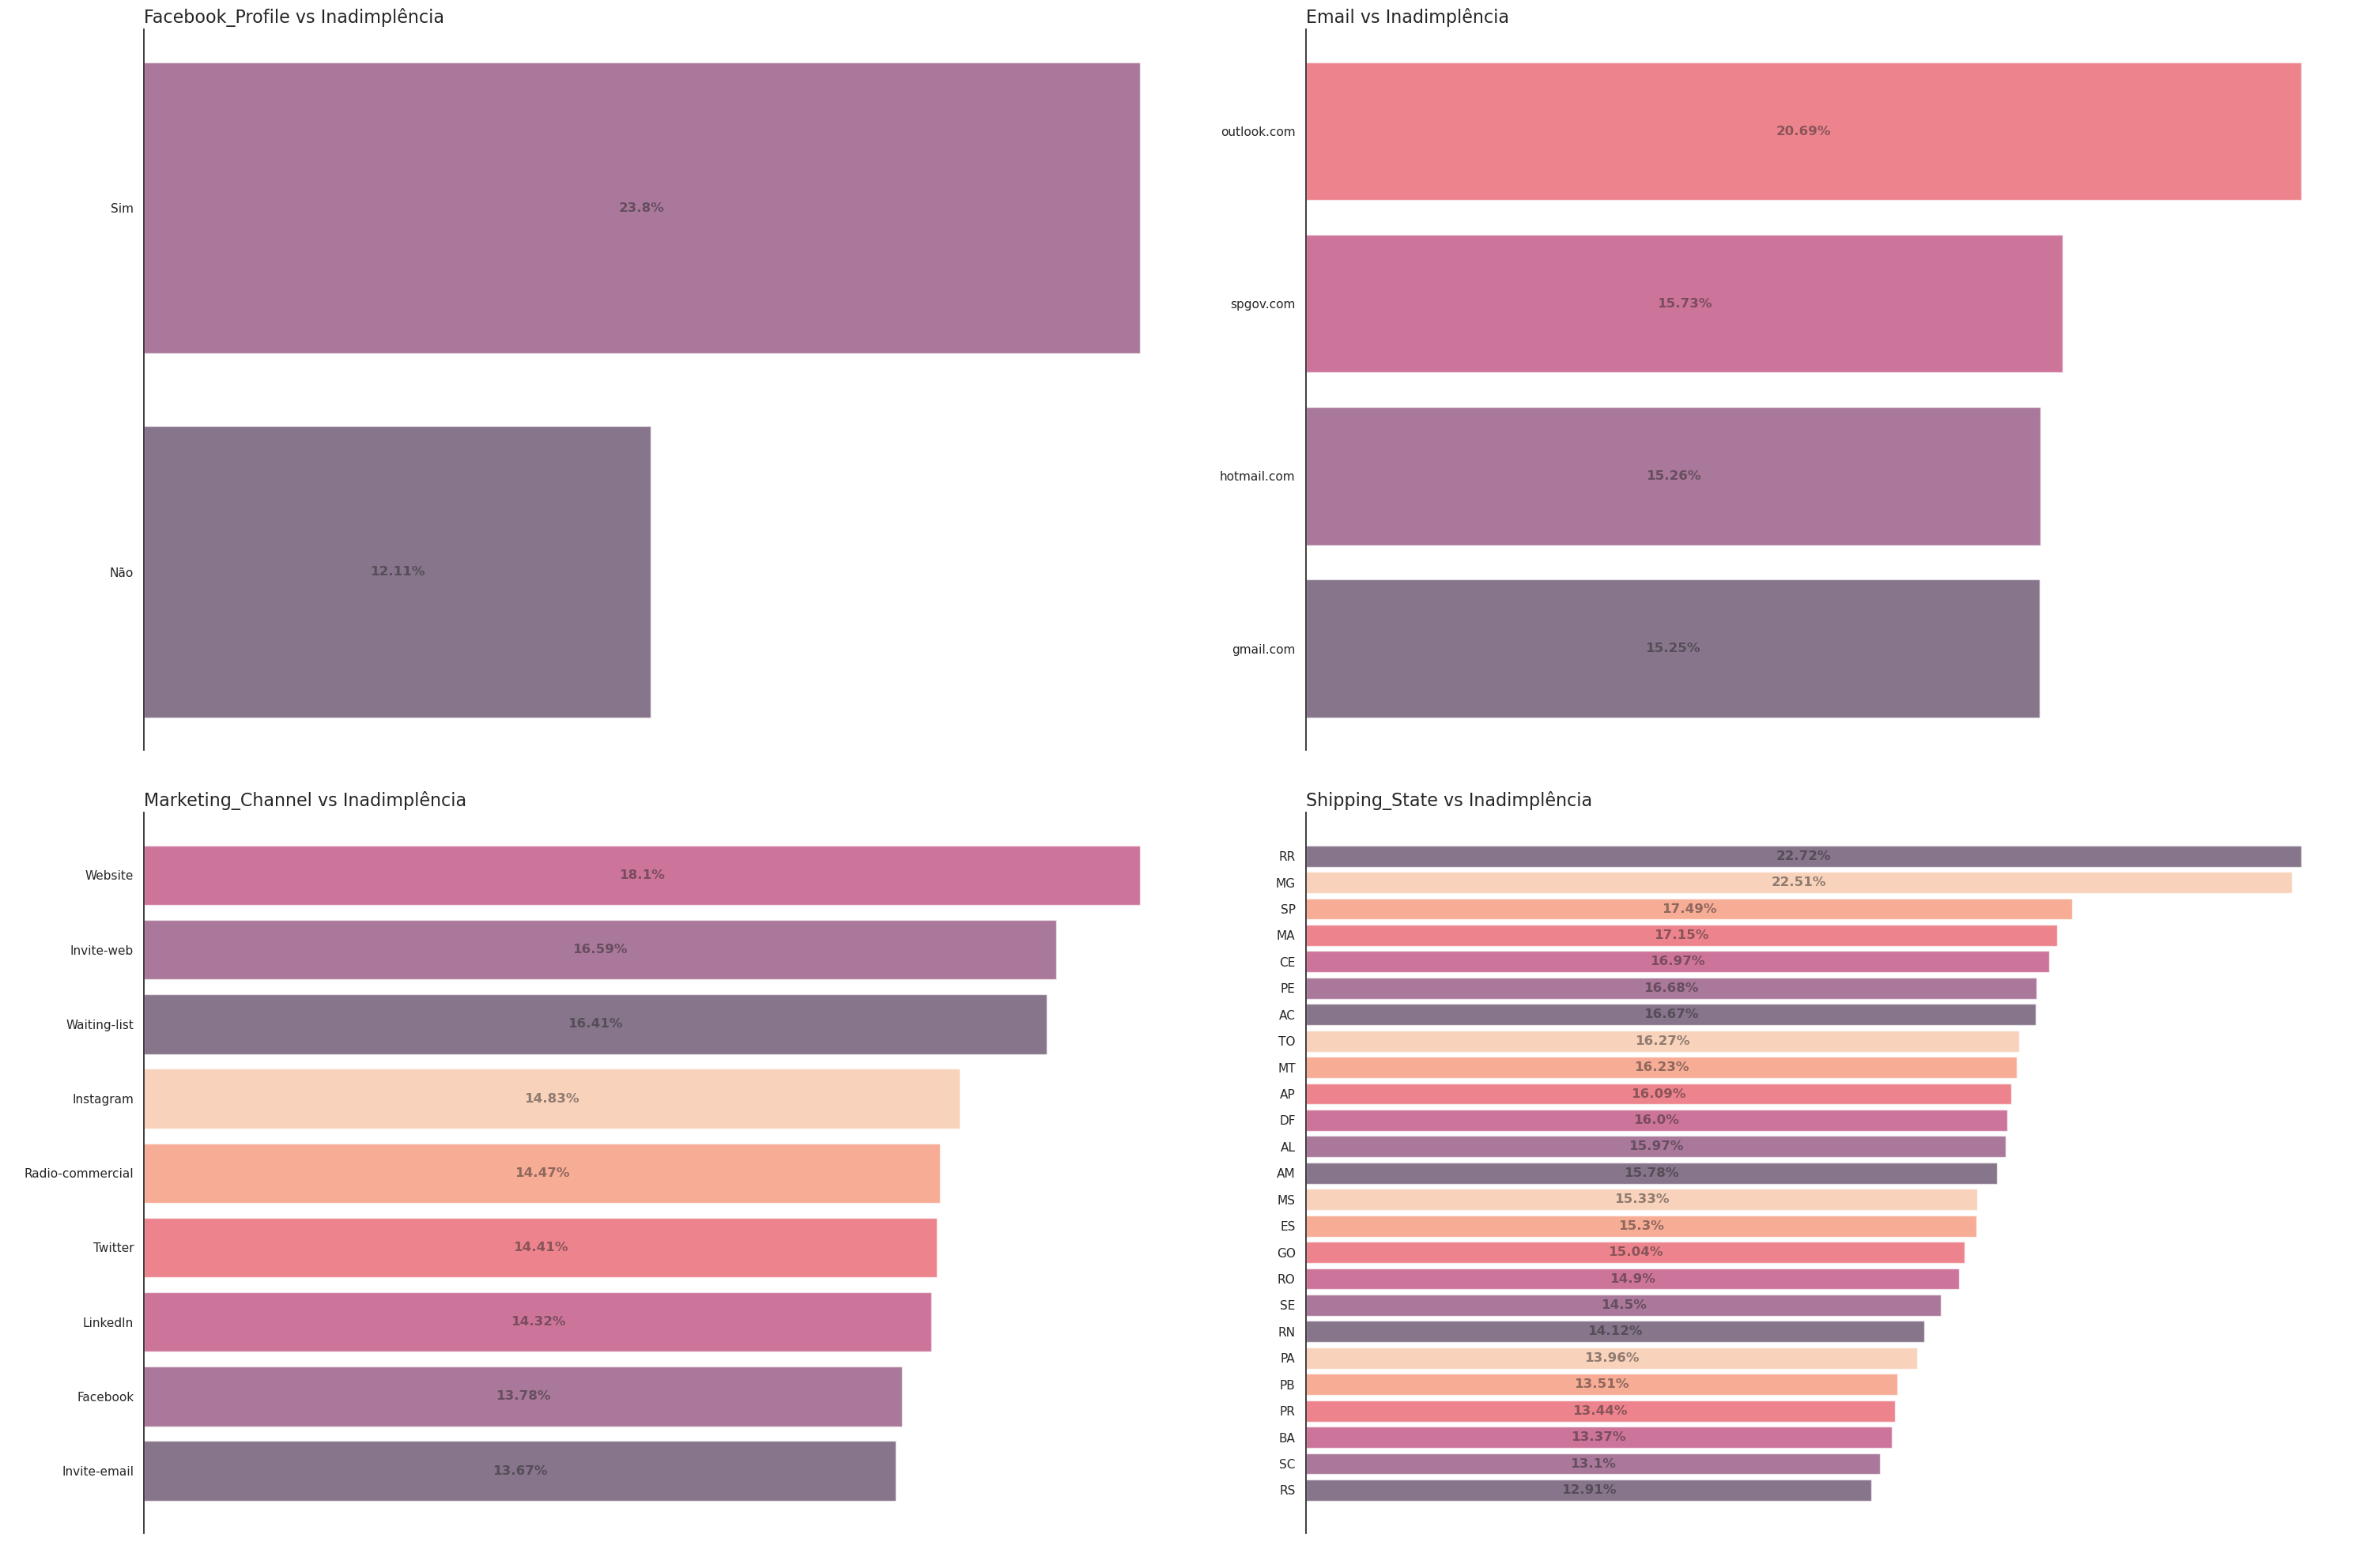

In [27]:
fig = plt.figure(figsize=(30,20))

for i in range(len(categorical_cols)):
    to_plot = df_clean.groupby(categorical_cols[i]).target_default.mean().sort_values() * 100
    ax = fig.add_subplot(2, 2, i+1)
    rects = ax.barh(to_plot.index, to_plot, alpha=0.6, color=sns.color_palette('rocket'))
    ax.tick_params(labelleft=True)
    ax.set_title(f'{categorical_cols[i].title()} vs Inadimplência', fontsize = 16, loc = 'left')

    ax.set_xticklabels([])
    ax.set_ylabel(" ")
    ax.set_xlabel(" ")
    sns.despine(bottom=True) 

    for rect in rects:
        width = rect.get_width()
        ax.text(y=rect.get_y() + rect.get_height() / 2, x=width * 0.5, s=f'{round(width, 2)}%', 
                ha='center', va='center', alpha=0.5, fontweight='bold')

plt.tight_layout()
plt.show()

* É visto que as transações realizadas com email outlook são as de maior inadimplência. 
* Aqueles que perfis com os facebooks cadastrados possuem a maior ocorrência de inadimplência.
* Roraima e Minas Gerais são so estados de maior inadimplentes. 
* Transações de website possuem maior inadimplência. 

Para enriquecer o modelo construi-se uma nova variável que divida os estados em regiões: norte, nordeste, centro-oeste, suldeste e sul. 

In [28]:
df_clean['shipping_state'].unique()

array(['RS', 'RR', 'MT', 'SP', 'AC', 'MS', 'PE', 'AM', 'CE', 'AP', 'MA',
       'BA', 'TO', 'RO', 'GO', 'SE', 'RN', 'MG', 'ES', 'PR', 'DF', 'PA',
       'SC', 'AL', 'PB'], dtype=object)

In [29]:
#Dicionário de estado por região
dict_regiao = {'RS': 'Sul', 
               'RR': 'Norte', 
               'MT': 'Centro-Oeste', 
               'SP': 'Sudeste', 
               'AC': 'Norte', 
               'MS': 'Centro-Oeste', 
               'PE': 'Nordeste',
               'AM': 'Norte', 
               'CE': 'Nordeste', 
               'AP': 'Norte', 
               'MA': 'Nordeste', 
               'BA': 'Nordeste', 
               'TO': 'Norte', 
               'RO': 'Norte',
               'GO': 'Centro-Oeste', 
               'SE': 'Nordeste', 
               'RN': 'Nordeste', 
               'MG': 'Sudeste', 
               'ES': 'Sudeste', 
               'PR': 'Sul', 
               'DF': 'Centro-Oeste',
               'SC': 'Sul', 
               'PA': 'Norte', 
               'AL': 'Nordeste', 
               'PB': 'Nordeste'}


#Criando uma variável por região
df_clean['region'] = df_clean['shipping_state'].apply(lambda x: dict_regiao[x])

## Preparação dos dados

Para o treinamento do modelo é necessário preparar os dados. Esta etapa está dividida entre:
* Transformar os dados categóricos em númericos iniciando ao aplicar *label econder** na variável facebook que há divide em 0 (não) e 1 (sim). 
* Aplicar *one hot encoder* nas deamis variáveis categóricas para serem diferenciadas em valores numéricos ao criar novas colunas.  
* Divisão dos dados em treino e teste. 
* Balancemento dos dados de três modos: *RandomUnderSample*, *RandomOverSample*, *SMOTE*. 

In [30]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

print(categorical_cols)

['score_1', 'score_2', 'facebook_profile', 'real_state', 'email', 'marketing_channel', 'shipping_state', 'region']


In [31]:
le = LabelEncoder()
df_clean['facebook_profile'] = le.fit_transform(df_clean['facebook_profile'])

cols_to_onehot = ['score_1', 'score_2','real_state', 'email', 'marketing_channel', 'shipping_state', 'region']

encoder = OneHotEncoder()

df_encoded = encoder.fit_transform(df_clean[cols_to_onehot])
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=encoder.get_feature_names(cols_to_onehot))

df_clean.drop(columns=cols_to_onehot, inplace=True)
df_clean = pd.concat([df_clean, df_encoded], axis=1)

In [32]:
X = df_clean.drop('target_default', axis = 1)
y = df_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X,y)

**Balanceamento RandomUnderSampling**

In [33]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

**Balanceamento SMOTE**

In [34]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

**Balanceamento RandomOverSamper**

In [35]:
ros = RandomOverSampler()
X_ros, y_ros = rus.fit_resample(X_train, y_train)

## Selecionando e treinando o modelo

In [36]:
def model_evaluation(X, y, model, verbose=True):
    """
    Função para avaliar um modelo de classificação usando validação cruzada e retornar diversas métricas de avaliação.

    Parâmetros:
    X (array-like): Matriz de características dos dados de treinamento.
    y (array-like): Vetor de rótulos dos dados de treinamento.
    model (estimador): Modelo de classificação a ser avaliado.
    verbose (bool, opcional): Se True, exibe as métricas de avaliação na saída padrão. Padrão é True.

    Retorna:
    Um dicionário com as métricas de avaliação do modelo.
    """
    # Transformando os dados de entrada em arrays numpy
    X = np.array(X)
    y = np.array(y)
  
    # Criando o pipeline de transformação e classificação
    pipeline = make_pipeline(StandardScaler(), model)
  
    # Realizando a validação cruzada do modelo e calculando as métricas de avaliação
    acc_scores = cross_val_score(pipeline, X, y, scoring='accuracy')
    recall_scores = cross_val_score(pipeline, X, y, scoring='recall')
    precision_scores = cross_val_score(pipeline, X, y, scoring='precision')
    f1_scores = cross_val_score(pipeline, X, y, scoring='f1')
    roc_scores = cross_val_score(pipeline, X, y, scoring = 'roc_auc')
  
    # Armazenando as métricas em um dicionário
    metrics = {
        'Accuracy': acc_scores.mean(), 
        'Accuracy Std': acc_scores.std(),
        'Recall': recall_scores.mean(), 
        'Recall Std': recall_scores.std(),
        'Precision': precision_scores.mean(),
        'Precision Std': precision_scores.std(),
        'F1 Score': f1_scores.mean(), 
        'F1 Score Std': f1_scores.std(),
        'Roc_auc': roc_scores.mean(),
        'Roc_auc Std': roc_scores.std()
    }
  
    # Exibindo as métricas se verbose=True
    if verbose:
        print(f'{model.__class__.__name__} metrics: {metrics}')
        
    # Retornando o dicionário de métricas
    return metrics

In [37]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

models = [rf, dt,lr, xgb]

### Avaliação dos dados balacenados por RandomUnderSampling

In [38]:
metrics_dict = {}

for model in models:
    metrics = model_evaluation(X_rus, y_rus, model)
    model_name = model.__class__.__name__
    metrics_dict[model_name] = metrics

RandomForestClassifier metrics: {'Accuracy': 0.6408645822076535, 'Accuracy Std': 0.00969240155208283, 'Recall': 0.6318051455588355, 'Recall Std': 0.016149310305388763, 'Precision': 0.6395202747477515, 'Precision Std': 0.013680832928880919, 'F1 Score': 0.6378837076566498, 'F1 Score Std': 0.010517301492375928, 'Roc_auc': 0.6927384150779735, 'Roc_auc Std': 0.01263322334858207}
DecisionTreeClassifier metrics: {'Accuracy': 0.5665124485189054, 'Accuracy Std': 0.007490177860016301, 'Recall': 0.5725193198454412, 'Recall Std': 0.01808151754578822, 'Precision': 0.5539622392339479, 'Precision Std': 0.008619874771225656, 'F1 Score': 0.5631122417715889, 'F1 Score Std': 0.00890876132821571, 'Roc_auc': 0.5651659286725706, 'Roc_auc Std': 0.00808828920749351}
LogisticRegression metrics: {'Accuracy': 0.6484581187036971, 'Accuracy Std': 0.01187591472168326, 'Recall': 0.6460157318741451, 'Recall Std': 0.0178033698343902, 'Precision': 0.6491412754047301, 'Precision Std': 0.01094324132895975, 'F1 Score': 0.

/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier metrics: {'Accuracy': 0.6163660350851915, 'Accuracy Std': 0.009416011912247516, 'Recall': 0.6095111239110087, 'Recall Std': 0.01362630917993887, 'Precision': 0.6180388300030735, 'Precision Std': 0.009759684214718324, 'F1 Score': 0.6136814474963157, 'F1 Score Std': 0.010113080620666971, 'Roc_auc': 0.657192610106178, 'Roc_auc Std': 0.012114719645980404}


In [39]:
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')

print('Avaliação dos dados balacenados por RandomUnderSampling')
df_metrics

Avaliação dos dados balacenados por RandomUnderSampling


,Accuracy,Accuracy Std,Recall,Recall Std,Precision,Precision Std,F1 Score,F1 Score Std,Roc_auc,Roc_auc Std
RandomForestClassifier,0.640865,0.009692,0.631805,0.016149,0.639520,0.013681,0.637884,0.010517,0.692738,0.012633
DecisionTreeClassifier,0.566512,0.007490,0.572519,0.018082,0.553962,0.008620,0.563112,0.008909,0.565166,0.008088
LogisticRegression,0.648458,0.011876,0.646016,0.017803,0.649141,0.010943,0.647522,0.013621,0.706155,0.012736
XGBClassifier,0.616366,0.009416,0.609511,0.013626,0.618039,0.009760,0.613681,0.010113,0.657193,0.012115


### Avaliação dos dados balanceados por RandomOverSampling

In [41]:
metrics_dict = {}

for model in models:
    metrics = model_evaluation(X_ros, y_ros, model)
    model_name = model.__class__.__name__
    metrics_dict[model_name] = metrics

RandomForestClassifier metrics: {'Accuracy': 0.6408630813011058, 'Accuracy Std': 0.012006068406980331, 'Recall': 0.6332712338301294, 'Recall Std': 0.010803912220127578, 'Precision': 0.6433239422665545, 'Precision Std': 0.012092579999333686, 'F1 Score': 0.6372568013705531, 'F1 Score Std': 0.012361820086100964, 'Roc_auc': 0.6908222480543685, 'Roc_auc Std': 0.011997257896373322}
DecisionTreeClassifier metrics: {'Accuracy': 0.5674908894972563, 'Accuracy Std': 0.01722685670181745, 'Recall': 0.5673737610099119, 'Recall Std': 0.014538443826107732, 'Precision': 0.5678033591711266, 'Precision Std': 0.012643030141242515, 'F1 Score': 0.5634365812181695, 'F1 Score Std': 0.015324517086564958, 'Roc_auc': 0.5629609463124294, 'Roc_auc Std': 0.010665653758865329}
LogisticRegression metrics: {'Accuracy': 0.6558066322058524, 'Accuracy Std': 0.006256925471254265, 'Recall': 0.644297045623635, 'Recall Std': 0.01198450718620537, 'Precision': 0.65944506746513, 'Precision Std': 0.004912625481223359, 'F1 Score'

/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier metrics: {'Accuracy': 0.6175920505985616, 'Accuracy Std': 0.01622433959334333, 'Recall': 0.6202900376796986, 'Recall Std': 0.01478858168492266, 'Precision': 0.6170533401484546, 'Precision Std': 0.01667130019721653, 'F1 Score': 0.618648111155099, 'F1 Score Std': 0.01537214157446553, 'Roc_auc': 0.6649535553715571, 'Roc_auc Std': 0.017701181379947223}


In [42]:
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')

print('Avaliação dos dados balanceados por RandomOverSampling')
df_metrics

Avaliação dos dados balanceados por RandomOverSampling


,Accuracy,Accuracy Std,Recall,Recall Std,Precision,Precision Std,F1 Score,F1 Score Std,Roc_auc,Roc_auc Std
RandomForestClassifier,0.640863,0.012006,0.633271,0.010804,0.643324,0.012093,0.637257,0.012362,0.690822,0.011997
DecisionTreeClassifier,0.567491,0.017227,0.567374,0.014538,0.567803,0.012643,0.563437,0.015325,0.562961,0.010666
LogisticRegression,0.655807,0.006257,0.644297,0.011985,0.659445,0.004913,0.651753,0.008194,0.709160,0.009385
XGBClassifier,0.617592,0.016224,0.620290,0.014789,0.617053,0.016671,0.618648,0.015372,0.664954,0.017701


### Avaliação dos dados balanceados por SMOTE

In [43]:
metrics_dict = {}

for model in models:
    metrics = model_evaluation(X_sm, y_sm, model)
    model_name = model.__class__.__name__
    metrics_dict[model_name] = metrics

RandomForestClassifier metrics: {'Accuracy': 0.9022596392055184, 'Accuracy Std': 0.19027104591744942, 'Recall': 0.8082904639261465, 'Recall Std': 0.38236544056791993, 'Precision': 0.9956208720607418, 'Precision Std': 0.0023157230733846907, 'F1 Score': 0.8145544095471431, 'F1 Score Std': 0.36575091913199226, 'Roc_auc': 0.9500818270857303, 'Roc_auc Std': 0.09980540601672101}
DecisionTreeClassifier metrics: {'Accuracy': 0.8227583769375819, 'Accuracy Std': 0.1470110425278464, 'Recall': 0.8028584588507977, 'Recall Std': 0.3686463965653985, 'Precision': 0.8492451359999287, 'Precision Std': 0.026542072362298774, 'F1 Score': 0.7487224855785469, 'F1 Score Std': 0.31362597154849625, 'Roc_auc': 0.823073305781544, 'Roc_auc Std': 0.14732590924842584}
LogisticRegression metrics: {'Accuracy': 0.6844329062159737, 'Accuracy Std': 0.05494802815918364, 'Recall': 0.6752474863150368, 'Recall Std': 0.12124780976911, 'Precision': 0.6826090648243041, 'Precision Std': 0.039262837258576586, 'F1 Score': 0.675770

/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:42:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:43:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:44:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/paulo/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1645117766796/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier metrics: {'Accuracy': 0.8895441083606366, 'Accuracy Std': 0.18373818683968476, 'Recall': 0.8085246449970034, 'Recall Std': 0.38224851477873883, 'Precision': 0.9715795730832026, 'Precision Std': 0.014245515071551584, 'F1 Score': 0.8022656561068077, 'F1 Score Std': 0.35896200035616843, 'Roc_auc': 0.9271921727311941, 'Roc_auc Std': 0.14546460361165467}


In [44]:
df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
print('Avaliação dos dados balanceados por SMOTE')
df_metrics

Avaliação dos dados balanceados por SMOTE


,Accuracy,Accuracy Std,Recall,Recall Std,Precision,Precision Std,F1 Score,F1 Score Std,Roc_auc,Roc_auc Std
RandomForestClassifier,0.902260,0.190271,0.808290,0.382365,0.995621,0.002316,0.814554,0.365751,0.950082,0.099805
DecisionTreeClassifier,0.822758,0.147011,0.802858,0.368646,0.849245,0.026542,0.748722,0.313626,0.823073,0.147326
LogisticRegression,0.684433,0.054948,0.675247,0.121248,0.682609,0.039263,0.675771,0.085711,0.755867,0.066267
XGBClassifier,0.889544,0.183738,0.808525,0.382249,0.971580,0.014246,0.802266,0.358962,0.927192,0.145465


Apesar dos valores mais altos nas métricas do método de balanceamento *SMOTE* os devios padrões também são altos. Isso deixa o erro do modelo também alto. Esses valores altos podem estar relacionados a um *overfitting*. 

O modelo escolhido para aplicação será o de Regressão logística com os dados balaceados podelo método de *RandomOverSample* apresenta um valor bom de *recall* e de *precision* que também apresenta um ótimo valor para a *ROC*. 

## Otimização do modelo

### Modelo regressão logística com os dados balancendos com RandomOverSample

#### Tuning dos hiperparâmetros

In [45]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lgr = LogisticRegression()

In [46]:
param_grid = {"penalty": ['l1', 'l2', 'elasticnet', 'none']}
search = GridSearchCV(lgr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_ros, y_ros)

/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [47]:
print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.5661437708498331 para {'penalty': 'l2'}


In [48]:
lgr = LogisticRegression(penalty = 'l2')

param_grid = {"C": [100, 10, 1, 0, 0.1, 0.01]}

search = GridSearchCV(lgr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_ros, y_ros)

/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [49]:
print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.5551182590539276 para {'C': 0.01}


In [50]:
lgr = LogisticRegression(penalty = 'l2', C = 0.01)

param_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

search = GridSearchCV(lgr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_ros, y_ros)

/home/paulo/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/paulo/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/

In [52]:
print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.649438404492764 para {'solver': 'liblinear'}


In [53]:
lgr = LogisticRegression(penalty = 'l2', C = 0.01, solver = 'liblinear')

param_grid = {"max_iter": [100, 200, 300, 400, 500, 700, 800, 900, 1000]}

search = GridSearchCV(lgr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_ros, y_ros)

In [54]:
print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.6501694986440109 para {'max_iter': 100}


In [55]:
lgr = LogisticRegression(penalty = 'l2', C = 0.01, solver = 'liblinear', max_iter = 100)

param_grid = {"fit_intercept": [True, False]}

search = GridSearchCV(lgr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_ros, y_ros)

In [56]:
print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.6435557515539875 para {'fit_intercept': True}


In [59]:
lgr_final = LogisticRegression(penalty = 'l2', C = 0.01, solver = 'liblinear', max_iter = 100, fit_intercept = True)

metrics = model_evaluation(X_ros, y_ros, lgr_final)

df_metrics = pd.DataFrame(metrics, index=['LogisticRegression'])
df_metrics

LogisticRegression metrics: {'Accuracy': 0.654336794423832, 'Accuracy Std': 0.007208814056433138, 'Recall': 0.6433181534547724, 'Recall Std': 0.014026320028608813, 'Precision': 0.6577754904259451, 'Precision Std': 0.005757492588447092, 'F1 Score': 0.6504217189198871, 'F1 Score Std': 0.009497732131059944, 'Roc_auc': 0.7096283983404603, 'Roc_auc Std': 0.009339209887020656}


,Accuracy,Accuracy Std,Recall,Recall Std,Precision,Precision Std,F1 Score,F1 Score Std,Roc_auc,Roc_auc Std
LogisticRegression,0.654337,0.007209,0.643318,0.014026,0.657775,0.005757,0.650422,0.009498,0.709628,0.009339


## Aplicação do modelo RandomFrorestClassifier otimizado nos dados de teste

In [60]:
#Instaciamento do modelo
lgr_final.fit(X_ros, y_ros)

LogisticRegression(C=0.01, solver='liblinear')

In [61]:
# Padronização dos dados de teste
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [62]:
# Aplicação do modelo
y_pred = lgr_final.predict(X_test)

/home/paulo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      0.58      0.71      7131
           1       0.25      0.72      0.37      1348

    accuracy                           0.61      8479
   macro avg       0.58      0.65      0.54      8479
weighted avg       0.81      0.61      0.66      8479

ROC_AUC Score: 0.6506939650383435 



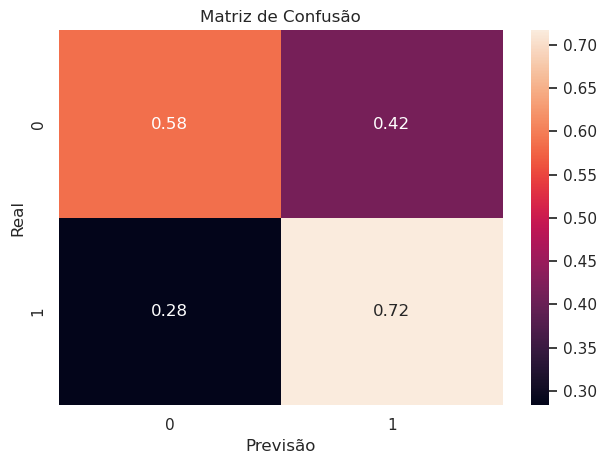

In [64]:
# Avaliação do modelo com dados de teste

print(classification_report(y_test, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_test, y_pred)}', '\n')

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Real')
ax.set_xlabel('Previsão')
plt.tight_layout()
plt.show()